In [3]:
!pip install arch

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.1
    Uninstalling pandas-1.5.1:
      Successfully uninstalled pandas-1.5.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.12.1 requires pandas<1.5.0,>=1.1.0, but you have pandas 1.5.2 which is incompatible.
pycaret 3.0.0rc2 requires pandas<1.5.0,>=1.3.0, but you have pandas 1.5.2 which is incompatible.


In [6]:

import seaborn as sns
sns.set()
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [7]:
#DIS Volatility
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)
data_price = web.DataReader('DIS', 'yahoo', start=start, end=end)
returns = 100 * data_price.Close.pct_change().dropna()

In [8]:
data_price.Close

Date
2014-12-31     94.190002
2015-01-02     93.750000
2015-01-05     92.379997
2015-01-06     91.889999
2015-01-07     92.830002
                 ...    
2020-06-04    123.690002
2020-06-05    124.820000
2020-06-08    127.279999
2020-06-09    123.889999
2020-06-10    122.180000
Name: Close, Length: 1370, dtype: float64

In [9]:
data_price

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,95.519997,94.029999,95.129997,94.190002,4797000.0,87.786346
2015-01-02,95.279999,92.849998,94.910004,93.750000,5865400.0,87.376274
2015-01-05,93.349998,91.779999,93.279999,92.379997,7789400.0,86.099403
2015-01-06,93.190002,91.160004,92.570000,91.889999,6793100.0,85.642700
2015-01-07,93.150002,92.099998,92.720001,92.830002,6589500.0,86.518806
...,...,...,...,...,...,...
2020-06-04,124.500000,121.849998,121.949997,123.690002,14195100.0,123.690002
2020-06-05,127.820000,124.279999,126.309998,124.820000,16581600.0,124.820000
2020-06-08,127.440002,123.940002,125.099998,127.279999,13858100.0,127.279999


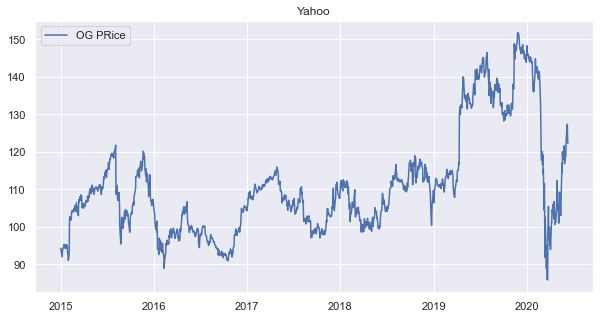

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(data_price.Close, label = 'OG PRice')
plt.title('Yahoo')
plt.legend()

In [11]:
#H0：Data is Non-stationary
#H1：Data is Stationary


from statsmodels.tsa.stattools import adfuller

price_p_value = adfuller(data_price.Close)
price_p_value

(-2.540185991137241,
 0.10600021976151613,
 9,
 1360,
 {'1%': -3.43516741587728,
  '5%': -2.8636675256494253,
  '10%': -2.567902695177336},
 5283.793277327725)

In [12]:
df=pd.DataFrame(returns)

In [13]:
df

,Close
Date,
2015-01-02,-0.467143
2015-01-05,-1.461336
2015-01-06,-0.530416
2015-01-07,1.022965
2015-01-08,1.034147
...,...
2020-06-04,1.235883
2020-06-05,0.913572
2020-06-08,1.970837


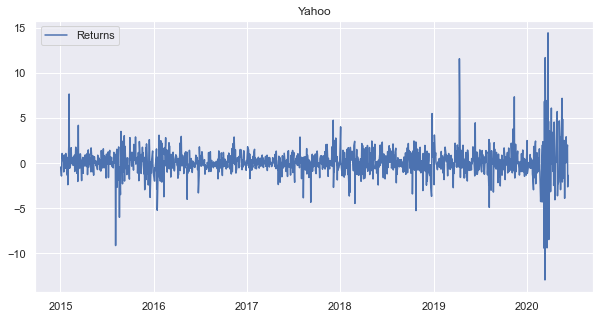

In [14]:


fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(returns, label = 'Returns')
plt.title('Yahoo')
plt.legend()

In [16]:
#H0：Data is Non-stationary
#H1：Data is Stationary


from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: ', result[1])
p_value = result[1]
print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

ADF Statistic: -11.320854
p-value:  1.1751793203266929e-20
Result: The series is stationary


In [17]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df['Close'])

KPSS Statistic: 0.035023969312887177
p-value: 0.1
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\malay\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [18]:
train_data= df.iloc[0:1095,0]
test=df.iloc[1095:,0]

In [19]:
!pip install pmdarima

In [20]:
import pmdarima as pmd
pmd_mdl = pmd.auto_arima(train_data, stationary = True)
pmd_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1095
Model:                        SARIMAX   Log Likelihood               -1793.442
Date:                Fri, 25 Nov 2022   AIC                           3588.883
Time:                        10:45:40   BIC                           3593.882
Sample:                             0   HQIC                          3590.775
                               - 1095                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.5493      0.025     61.898      0.000       1.500       1.598
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6567.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.27
Prob(H) (two-sided):                  0.84   Kurtosis:                        14.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

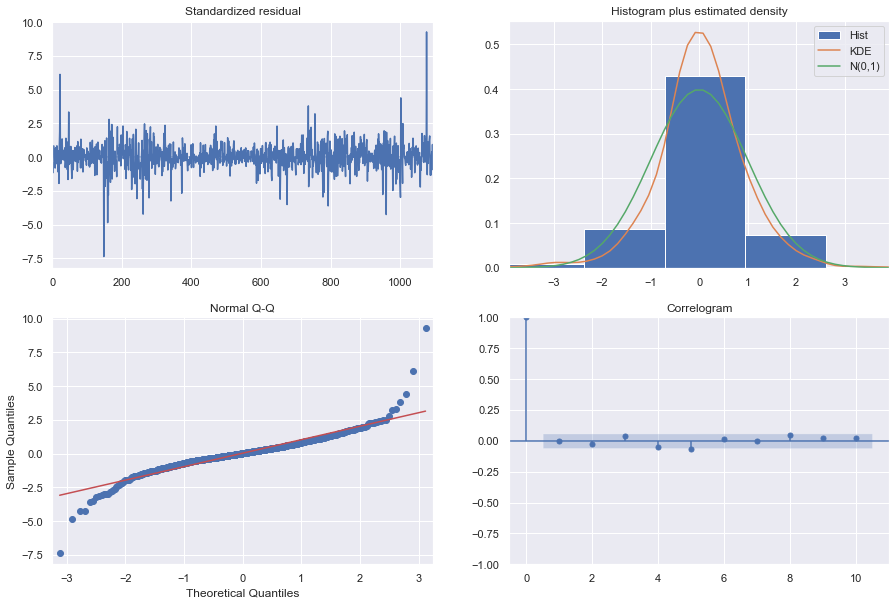

In [21]:
pmd_mdl.plot_diagnostics(figsize = (15, 10))
plt.show()

In [22]:
#H0：Error term is white noise

#H1：Error term is not white noise


from statsmodels.stats.diagnostic import acorr_ljungbox

arima_resid = pmd_mdl.arima_res_.resid

white_noise_arima = acorr_ljungbox(arima_resid, lags = [10], return_df=True)
white_noise_arima

,lb_stat,lb_pvalue
10,13.518994,0.196083


In [23]:
#H0： ARCH Effect not exists

#H1：ARCH Effect exists
from statsmodels.stats.diagnostic import het_arch

LM_pvalue = het_arch(arima_resid, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

LM-test-Pvalue: 0.91672


C:\Users\malay\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


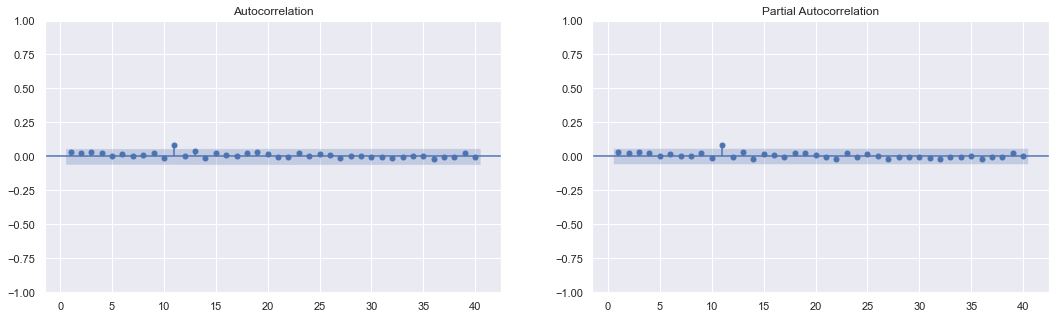

In [24]:
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(1, 2, figsize = (18,5))

sgt.plot_acf(arima_resid**2, zero = False, lags = 40, ax=ax[0])
sgt.plot_pacf(arima_resid**2, zero = False, lags = 40, ax=ax[1])

plt.show()

In [25]:
from arch import arch_model

In [26]:
mdl_garch = arch_model(arima_resid, vol = 'GARCH', p = 1, q = 1)
garch_fit = mdl_garch.fit()
garch_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5939.993922182261
Iteration:      2,   Func. Count:     15,   Neg. LLF: 15045.123339481428
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1811.3336796302312
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1841.0841532287964
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1766.4357734310895
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1766.4355265680742
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1766.4355118856515
Iteration:      8,   Func. Count:     51,   Neg. LLF: 1766.435511886345
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1766.4355118856515
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1766.44
Distribution:                  Normal   AIC:                           3540.87
Method:            Maximum Likelihood   BIC:                           3560.87
                                        No. Observations:                 1095
Date:                Fri, Nov 25 2022   Df Residuals:                     1094
Time:                        10:51:12   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0167  3.577e-02      0.466      0.641 [-5.343e-02,8.680e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1990      0.213      0.934      0.350    [ -0.219,  0.617]
alpha[1]       0.1043  9.098e-02      1.146      0.252 [-7.408e-02,  0.283]
beta[1]        0.7785      0.192      4.051  5.107e-05    [  0.402,  1.155]
===========================================================================

Covariance estimator: robust
"""

C:\Users\malay\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


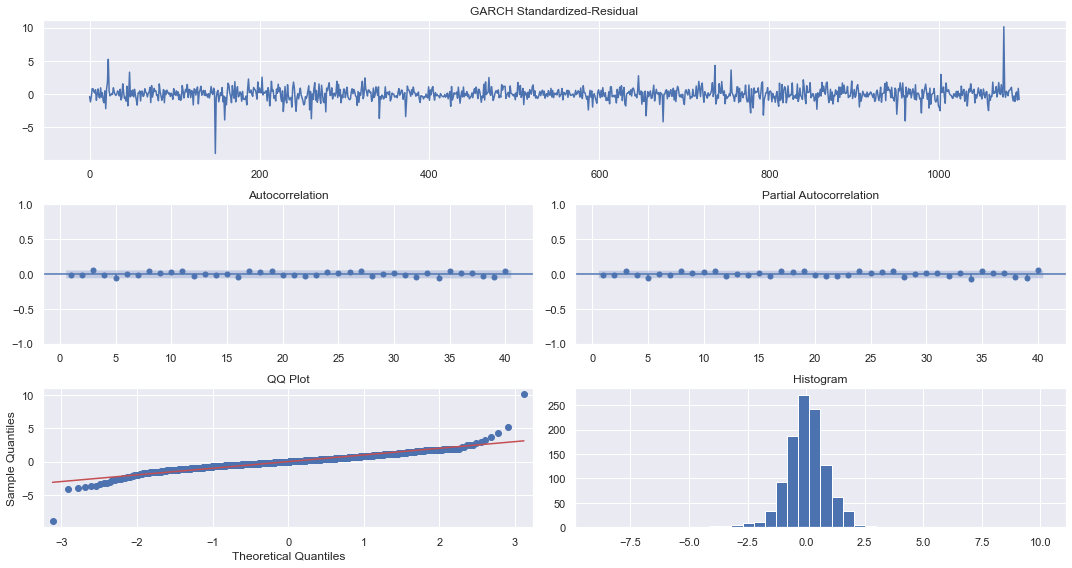

In [27]:
import statsmodels.api as sm

garch_std_resid = pd.Series(garch_fit.resid / garch_fit.conditional_volatility)
fig = plt.figure(figsize = (15, 8))

# Residual
garch_std_resid.plot(ax = fig.add_subplot(3,1,1), title = 'GARCH Standardized-Residual', legend = False)

# ACF/PACF
sgt.plot_acf(garch_std_resid, zero = False, lags = 40, ax=fig.add_subplot(3,2,3))
sgt.plot_pacf(garch_std_resid, zero = False, lags = 40, ax=fig.add_subplot(3,2,4))

# QQ-Plot & Norm-Dist
sm.qqplot(garch_std_resid, line='s', ax=fig.add_subplot(3,2,5)) 
plt.title("QQ Plot")
fig.add_subplot(3,2,6).hist(garch_std_resid, bins = 40)
plt.title("Histogram")

plt.tight_layout()
plt.show()

In [28]:
white_noise_garch = acorr_ljungbox(garch_std_resid, lags = [10], return_df=True)
white_noise_garch

,lb_stat,lb_pvalue
10,10.65601,0.384938
